In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("heart.csv")
df
#df.shape

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
categorical_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
df_categorical = df.loc[:, categorical_list]
df_categorical

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


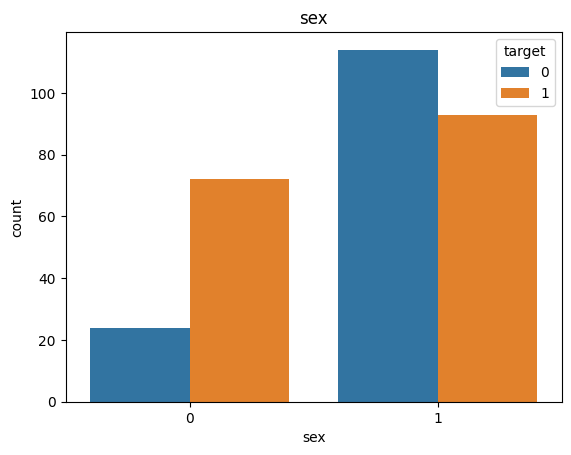

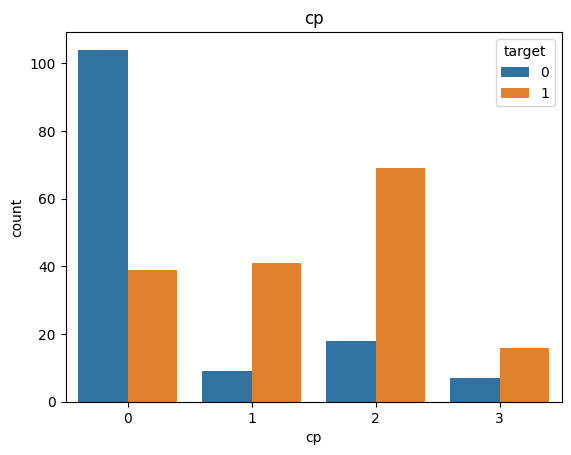

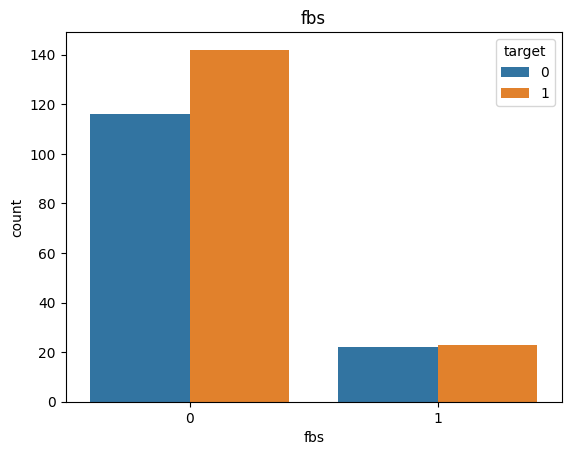

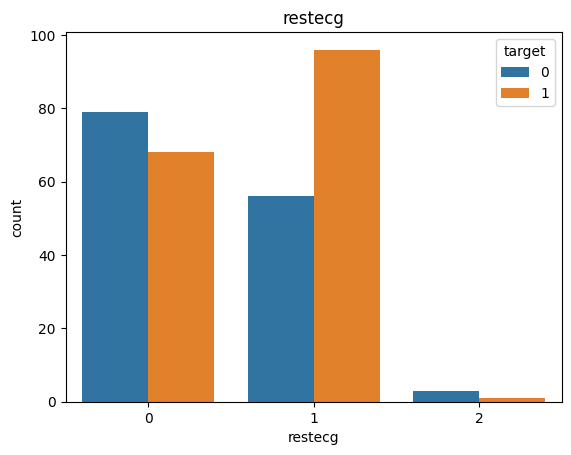

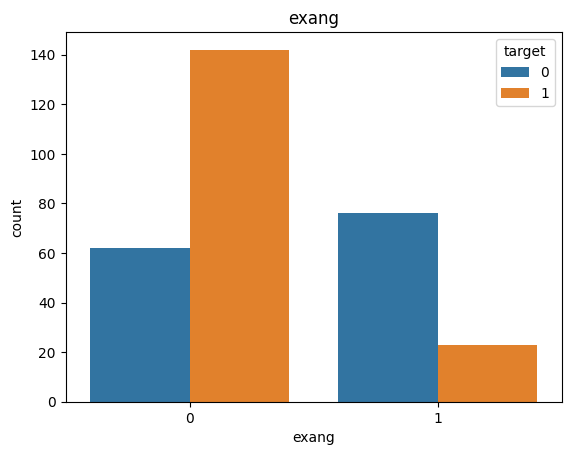

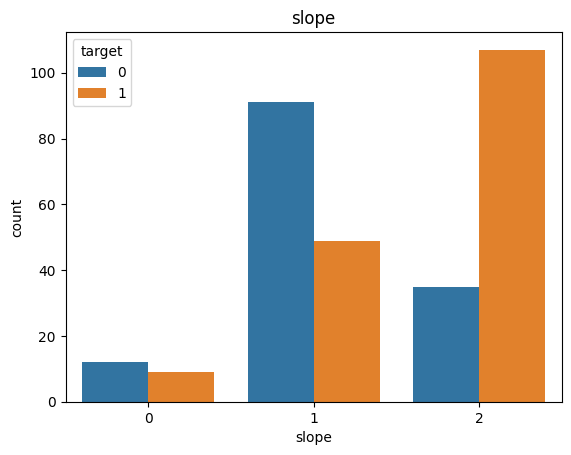

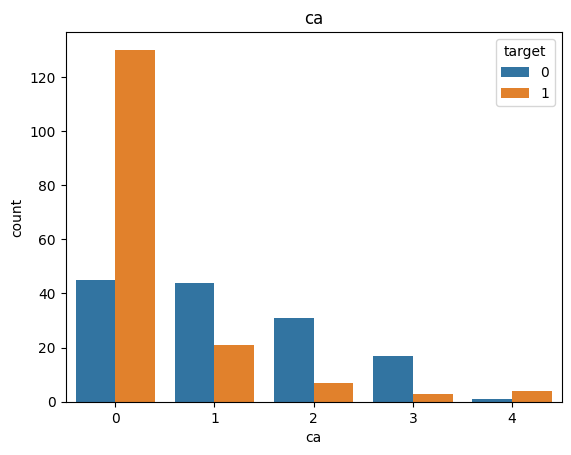

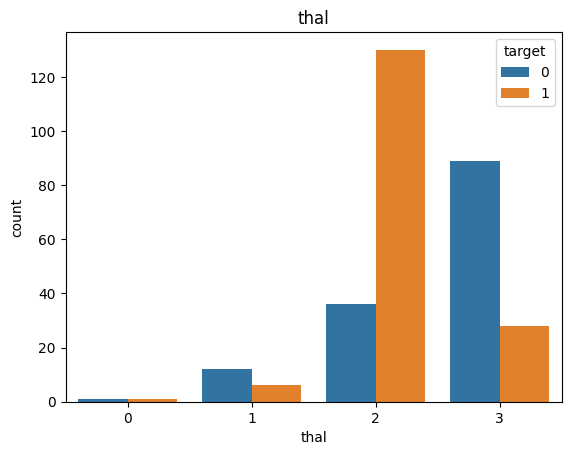

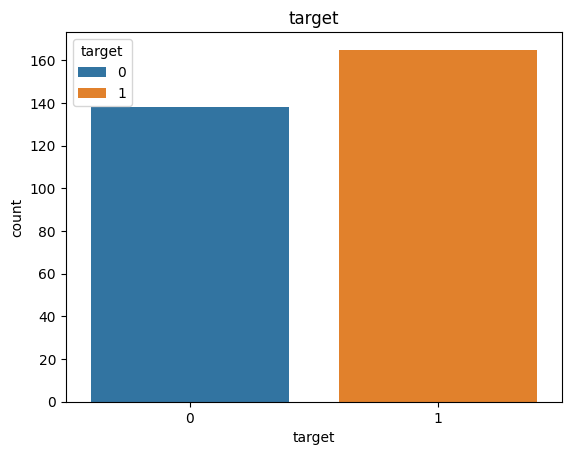

In [10]:
for i in categorical_list:
    plt.figure()
    sns.countplot(x=i, data=df_categorical, hue="target")
    plt.title(i)

In [11]:
numeric_list = ['age',  'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
df_numeric = df.loc[:, numeric_list]
df_numeric

,age,trestbps,chol,thalach,oldpeak,target
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,0
301,57,130,131,115,1.2,0


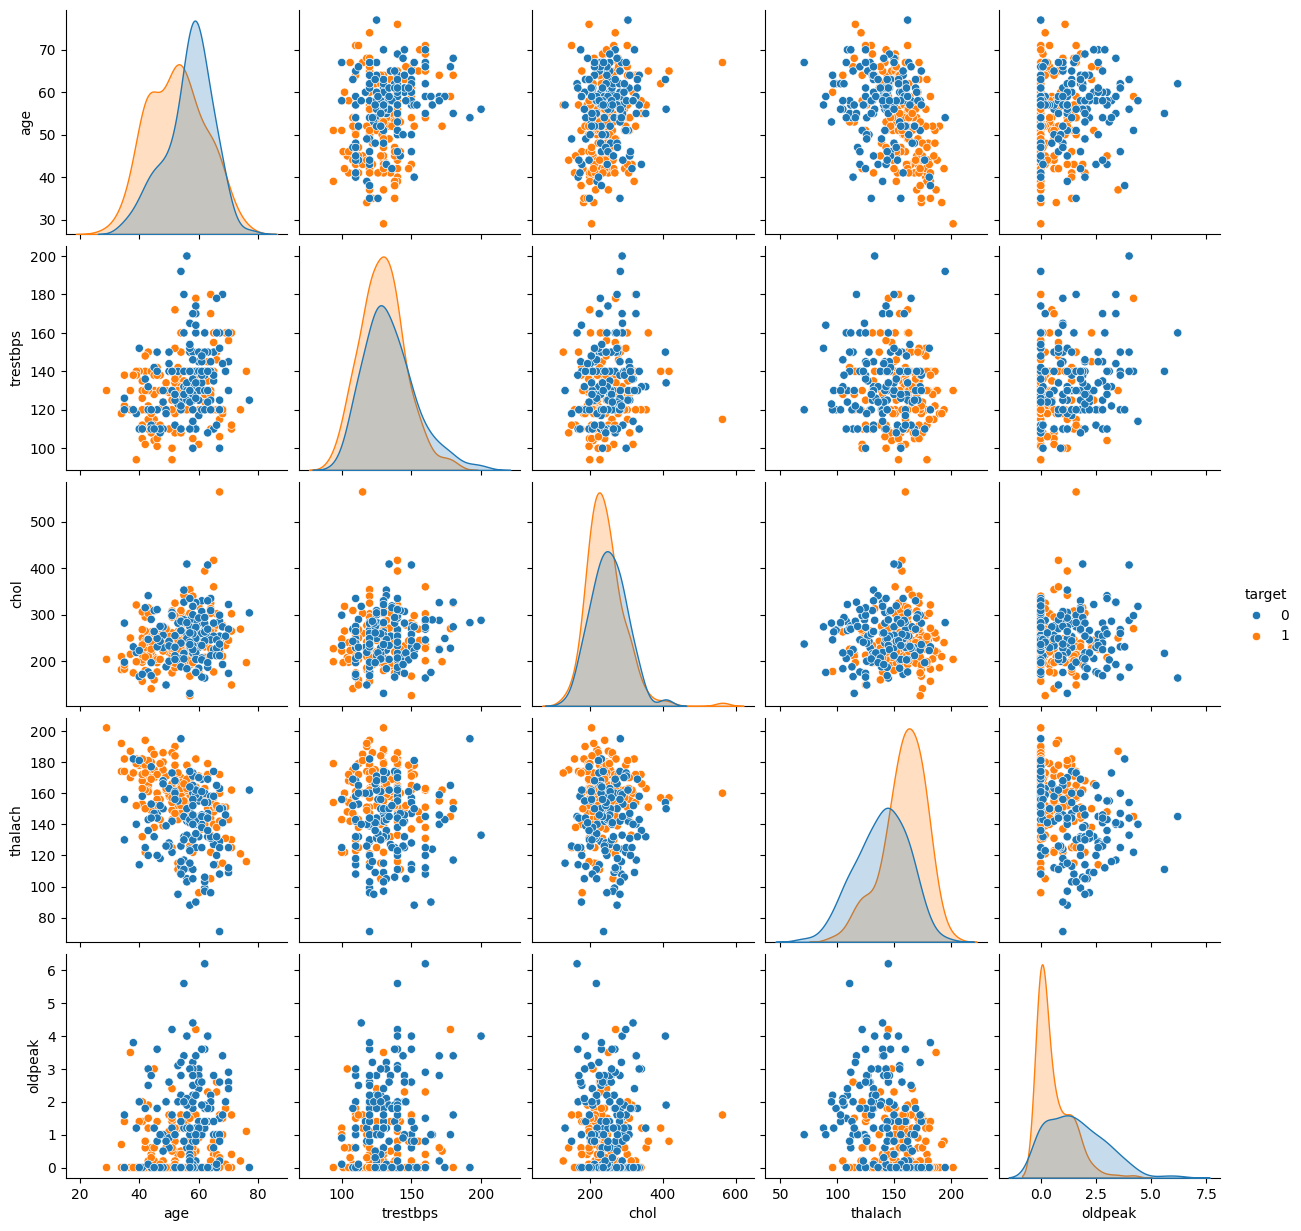

In [12]:
sns.pairplot(df_numeric, hue="target", diag_kind = "kde")
plt.show()

In [13]:
scaler = StandardScaler()   #target hariç hepsini 0 ile 1 arasına sıkıştırdık
scaled_array = scaler.fit_transform(df[numeric_list[:-1]])
scaled_array

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [14]:
df_dummy = pd.DataFrame(scaled_array, columns=numeric_list[:-1])
df_dummy = pd.concat([df_dummy, df.loc[:, "target"]], axis=1)
df_dummy

,age,trestbps,chol,thalach,oldpeak,target
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1
...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0


In [15]:
data_melted = pd.melt(df_dummy, id_vars="target", var_name="features", value_name="value")
data_melted

,target,features,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464
...,...,...,...
1510,0,oldpeak,-0.724323
1511,0,oldpeak,0.138373
1512,0,oldpeak,2.036303
1513,0,oldpeak,0.138373


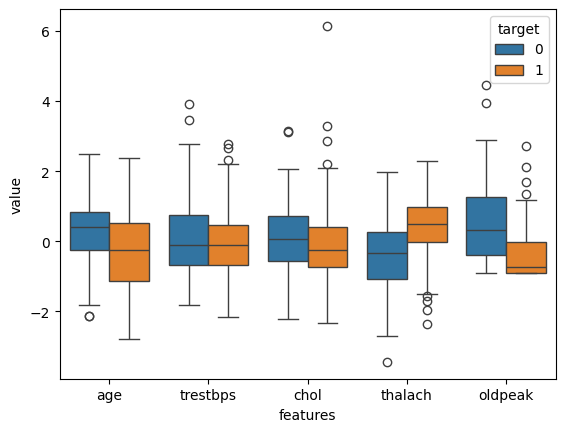

In [16]:
plt.figure()
sns.boxplot(x="features", y="value", hue="target", data=data_melted)
plt.show()

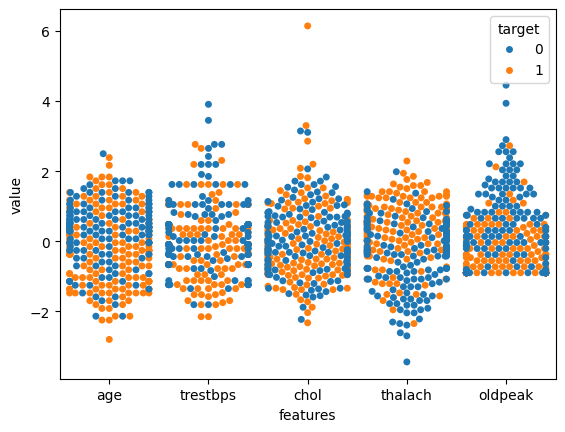

In [17]:
plt.figure()
sns.swarmplot(x="features", y="value", hue="target", data=data_melted)
plt.show()

<Figure size 640x480 with 0 Axes>

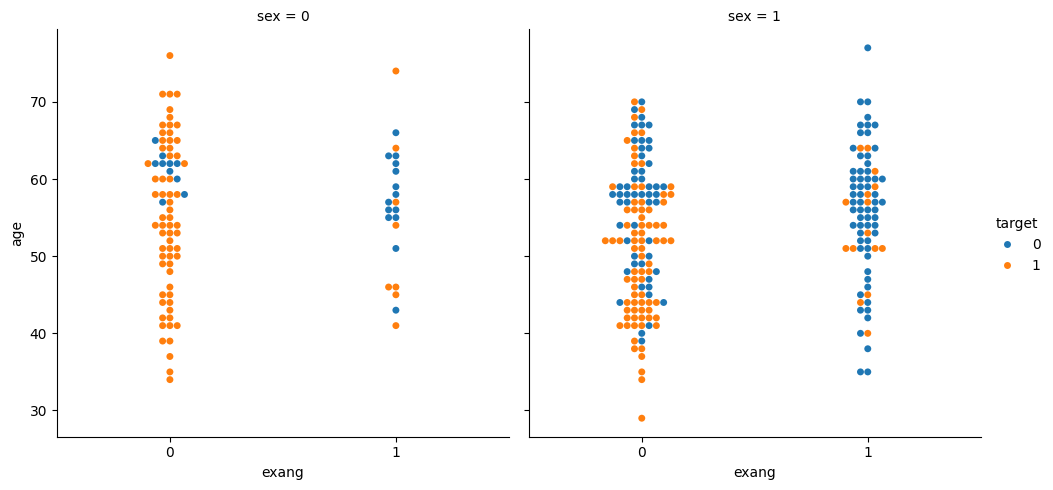

In [18]:
plt.figure()
sns.catplot(x="exang", y="age", hue="target", kind="swarm", col='sex', data=df)
plt.show()

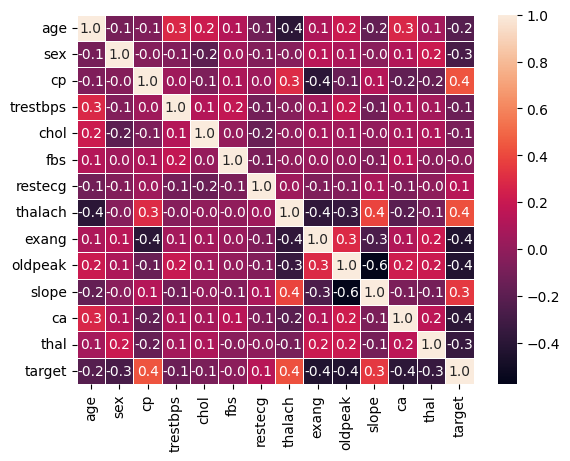

In [19]:
plt.figure()
sns.heatmap(df.corr(), annot=True, fmt = ".1f", linewidths=0.7)
plt.show()

In [20]:
numeric_list = ['age',  'trestbps', 'chol', 'thalach', 'oldpeak']
df_numeric = df.loc[:, numeric_list]
df_numeric

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [27]:
for i in numeric_list:
  Q1 = np.percentile(df.loc[:, i], 25)
  Q3 = np.percentile(df.loc[:, i], 75)
  IQR = Q3 - Q1
  print(f"{i} : {df.loc[:, i].shape}")
  upper = np.where(df.loc[:, i] >= Q3 + 1.5 * IQR)
  lower = np.where(df.loc[:, i] <= Q1 - 1.5 * IQR)
  lower = Q1 - 1.5 * IQR

  try:
    df.drop(upper[0], inplace=True)
  except:
    print("hata")
  try:
    df.drop(lower[0], inplace=True)
  except:
    print("hata")

  print(f"{df.shape}")

age : (285,)
hata
(285, 14)
trestbps : (285,)
hata
(285, 14)
chol : (285,)
hata
(280, 14)
thalach : (280,)
hata
(280, 14)
oldpeak : (280,)
hata
(274, 14)


In [28]:
df1 = df.copy()
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [29]:
df1 = pd.get_dummies(df1, columns=categorical_list[:-1], drop_first = True)
df1

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
299,45,110,264,132,1.2,0,True,False,False,True,...,False,True,False,False,False,False,False,False,False,True
300,68,144,193,141,3.4,0,True,False,False,False,...,False,True,False,False,True,False,False,False,False,True
301,57,130,131,115,1.2,0,True,False,False,False,...,True,True,False,True,False,False,False,False,False,True


In [32]:
X = df1.drop(["target"], axis=1)
y = df1[["target"]]

In [33]:
X

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
299,45,110,264,132,1.2,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
300,68,144,193,141,3.4,True,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
301,57,130,131,115,1.2,True,False,False,False,False,...,True,True,False,True,False,False,False,False,False,True


In [34]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [36]:
scaler = StandardScaler()
X[numeric_list[:-1]] = scaler.fit_transform(X[numeric_list[:-1]])

In [37]:
X

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.960758,1.056263,-0.231409,-0.014509,2.3,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.832890,0.021895,0.091316,1.619869,3.5,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.403098,0.021895,-0.781940,0.957283,1.4,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.208622,-0.667683,-0.174457,1.222318,0.8,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.316070,-0.667683,2.065635,0.559732,0.6,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.316070,0.711473,-0.079538,-1.207164,0.2,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
299,-0.973306,-1.357261,0.357090,-0.809612,1.2,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
300,1.497998,0.987305,-0.990762,-0.412061,3.4,True,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
301,0.316070,0.021895,-2.167760,-1.560543,1.2,True,False,False,False,False,...,True,True,False,True,False,False,False,False,False,True


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((219, 22), (55, 22), (219, 1), (55, 1))

In [50]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_pred_prob = logreg.predict_proba(X_test)

In [52]:
y_pred_prob

array([[0.26739871, 0.73260129],
       [0.99090843, 0.00909157],
       [0.75836809, 0.24163191],
       [0.03270003, 0.96729997],
       [0.67802697, 0.32197303],
       [0.99456105, 0.00543895],
       [0.31615846, 0.68384154],
       [0.98300522, 0.01699478],
       [0.35817719, 0.64182281],
       [0.42947338, 0.57052662],
       [0.49433287, 0.50566713],
       [0.57571868, 0.42428132],
       [0.99316184, 0.00683816],
       [0.9260668 , 0.0739332 ],
       [0.93480093, 0.06519907],
       [0.03459557, 0.96540443],
       [0.68975502, 0.31024498],
       [0.30986421, 0.69013579],
       [0.27675287, 0.72324713],
       [0.9928622 , 0.0071378 ],
       [0.05925394, 0.94074606],
       [0.2993103 , 0.7006897 ],
       [0.64510565, 0.35489435],
       [0.12391628, 0.87608372],
       [0.98508222, 0.01491778],
       [0.96011308, 0.03988692],
       [0.00561753, 0.99438247],
       [0.08304327, 0.91695673],
       [0.21916812, 0.78083188],
       [0.01242046, 0.98757954],
       [0.

In [54]:
y_pred = np.argmax(y_pred_prob, axis=1)

In [55]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [56]:
accuracy_score(y_test, y_pred)

0.8909090909090909

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])

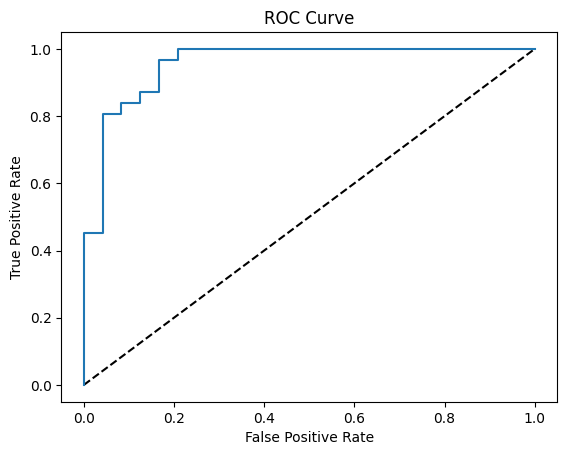

In [60]:
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [61]:
lr = LogisticRegression()  #hyperparameter tuning

In [64]:
penalty = ["l1", "l2"]
parameters = {"penalty":penalty}

In [65]:
lr_searcher = GridSearchCV(lr, parameters, cv=5)
lr_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2']})

In [66]:
print(f"best parameters: {lr_searcher.best_params_}")
print(f"best score: {lr_searcher.best_score_}")

best parameters: {'penalty': 'l2'}
best score: 0.8313953488372092


In [67]:
y_pred = lr_searcher.predict(X_test)

In [73]:
accuracy_score(y_test, y_pred)

0.8909090909090909

In [75]:
cm = confusion_matrix(y_test, y_pred)

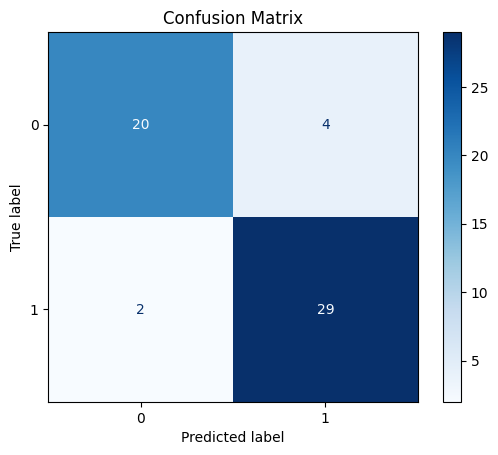

In [76]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()